# 6장 특성변수

## 6.1 특성공학

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.rcParams['font.family']='Malgun Gothic'

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = (np.arange(11, dtype=np.float) - 5).reshape(-1, 1)
scaler.fit(X)
scaler.transform(X)

StandardScaler()

array([[-1.58113883],
       [-1.26491106],
       [-0.9486833 ],
       [-0.63245553],
       [-0.31622777],
       [ 0.        ],
       [ 0.31622777],
       [ 0.63245553],
       [ 0.9486833 ],
       [ 1.26491106],
       [ 1.58113883]])

In [57]:
scaler.transform(X).mean()
scaler.transform(X).std()

1.0092936587501423e-16

1.0

In [4]:
df = pd.read_pickle('../data/4장자료_01.pkl')
df.shape
df.head()

(3997, 50)

,성별,연령,지역,직업,가구소득,학력,주거형태,결혼,자녀수,인터넷평일,...,tv9,tv10,tv11,tv12,tv13,tv14,tv15,tv16,tv17,구매
0,1,14.0,서울,학생재수생,6.0,중학교재학,월세,미혼,0.0,0.000000,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1,14.0,서울,학생재수생,6.0,중학교재학,자가,미혼,0.0,30.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1,14.0,서울,학생재수생,6.0,중학교재학,전세,미혼,0.0,90.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,1,14.0,서울,학생재수생,8.0,중학교재학,자가,미혼,0.0,68.876933,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1,14.0,서울,학생재수생,9.0,중학교재학,자가,미혼,0.0,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [59]:
df[['가구소득', '학력', '주거형태']]

,가구소득,학력,주거형태
0,6.0,중학교재학,월세
1,6.0,중학교재학,자가
2,6.0,중학교재학,전세
3,8.0,중학교재학,자가
4,9.0,중학교재학,자가
...,...,...,...
3992,1.0,중학교졸업,자가
3993,7.0,고등학교졸업,자가
3994,4.0,중학교졸업,전세
3995,2.0,중학교졸업,자가


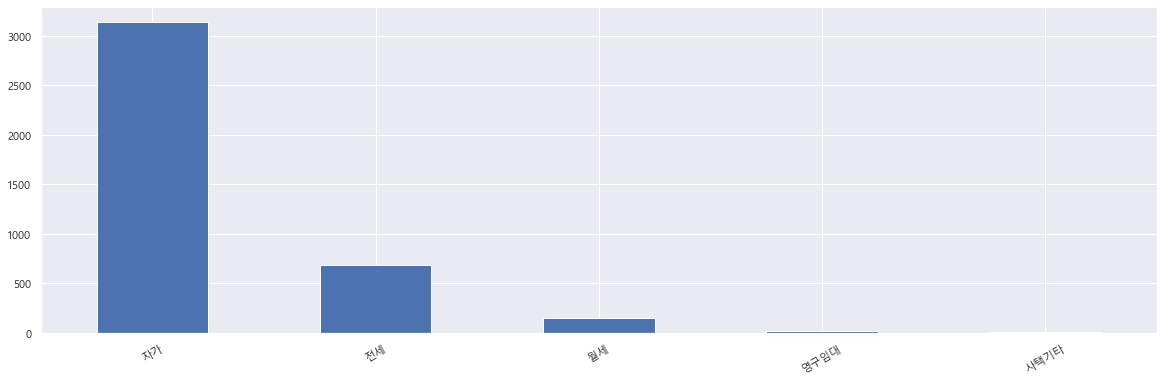

In [60]:
df['주거형태'].value_counts().plot(kind='bar', rot='30', figsize=(20,6))
df['주거형태'].replace({'영구임대': '월세', '사택기타':'월세'}, inplace=True) 

In [61]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(df['주거형태'].values.reshape(-1,1))
enc.categories_
enc.transform(df['주거형태'].values.reshape(-1,1))
df['주거형태']= enc.transform(df['주거형태'].values.reshape(-1,1))

OrdinalEncoder()

[array(['월세', '자가', '전세'], dtype=object)]

array([[0.],
       [1.],
       [2.],
       ...,
       [2.],
       [1.],
       [1.]])

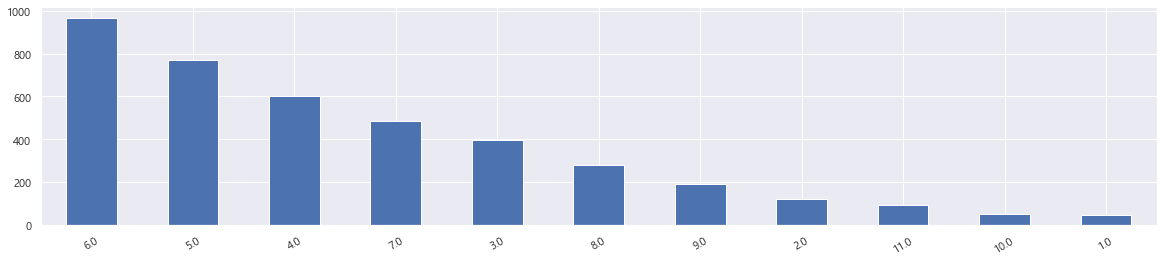

In [62]:
df['가구소득'].value_counts().plot(kind='bar', rot='30', figsize=(20,4)) 

In [63]:
df['가구소득'].replace({1: 2, 11:10}, inplace=True) 

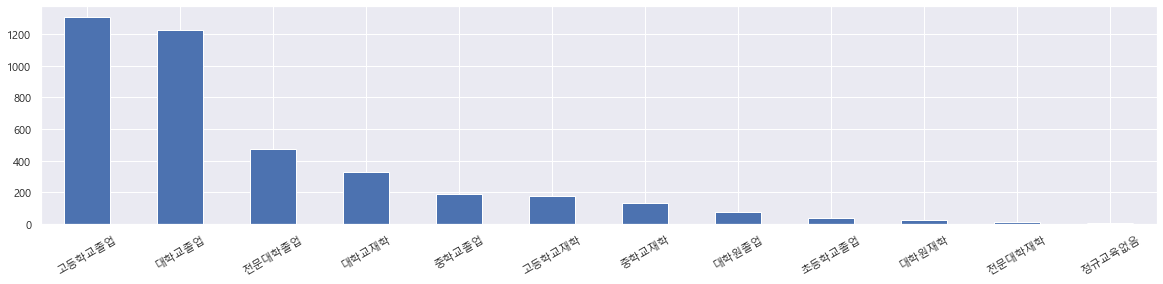

In [64]:
df.학력.value_counts().plot(kind='bar', rot='30', figsize=(20,4))  

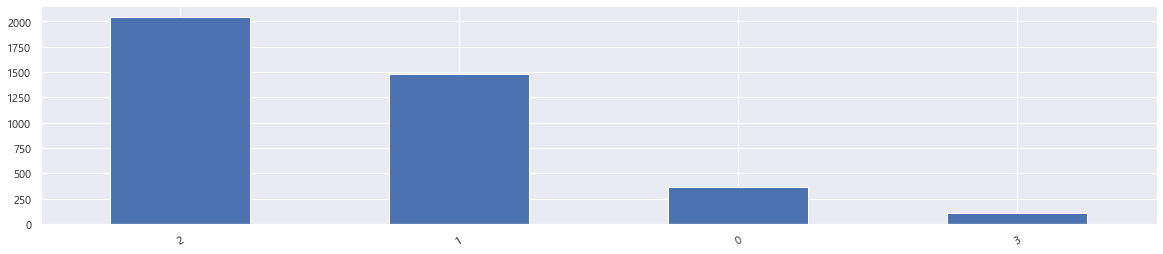

In [65]:
df['학력'] = df['학력'].map({'정규교육없음':0,'초등학교졸업':0,
                         '중학교졸업':0,'중학교재학':0, 
                         '고등학교졸업':1,'고등학교재학':1, 
                         '전문대학졸업':2,'전문대학재학':2,
                         '대학교졸업':2,'대학교재학':2, 
                         '대학원졸업':3,'대학원재학':3}) 
df['학력'].value_counts().plot(kind='bar',  rot='30', figsize=(20,4))

In [66]:
df[['가구소득', '학력', '주거형태']].head()

,가구소득,학력,주거형태
0,6.0,0,0.0
1,6.0,0,1.0
2,6.0,0,2.0
3,8.0,0,1.0
4,9.0,0,1.0


In [67]:
df.columns[df.dtypes == 'category']
Cats = df.columns[df.dtypes == 'category']

Index(['성별', '지역', '직업', '결혼', '연령대'], dtype='object')

In [68]:
from sklearn.preprocessing import OneHotEncoder
ohc = OneHotEncoder()
ohc.fit(df[Cats])
ohc.transform(df[Cats])
ohc.categories_

OneHotEncoder()

<3997x26 sparse matrix of type '<class 'numpy.float64'>'
	with 19985 stored elements in Compressed Sparse Row format>

[array([1, 2], dtype=int64),
 array(['강원', '경기인천', '광주전라제주', '대구경북', '대전충청세종', '부산울산경남', '서울'],
       dtype=object),
 array(['기능노무직', '무직기타', '사무직', '전업주부', '판매서비스직', '학생재수생', '행정관리전문직'],
       dtype=object),
 array(['기타_이혼별거사별', '기혼', '미혼'], dtype=object),
 array([1, 2, 3, 4, 5, 6, 7], dtype=int64)]

In [69]:
df[Cats].nunique()
df[Cats].nunique().sum()
type(ohc.transform(df[Cats]))
ohc.transform(df[Cats]).toarray().shape
ohc.transform(df[Cats]).toarray()

성별     2
지역     7
직업     7
결혼     3
연령대    7
dtype: int64

26

scipy.sparse.csr.csr_matrix

(3997, 26)

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [70]:
pd.get_dummies(df[Cats], prefix = Cats)

,성별_1,성별_2,지역_서울,지역_경기인천,지역_대전충청세종,지역_광주전라제주,지역_부산울산경남,지역_대구경북,지역_강원,직업_행정관리전문직,...,결혼_기혼,결혼_미혼,결혼_기타_이혼별거사별,연령대_1,연령대_2,연령대_3,연령대_4,연령대_5,연령대_6,연령대_7
0,1,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3992,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3993,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3994,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3995,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [71]:
Cats
float_list = [item for item in df.drop(['구매'], axis=1).columns if item not in Cats]

Index(['성별', '지역', '직업', '결혼', '연령대'], dtype='object')

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for col in float_list : 
    df[col] = scaler.fit_transform(df[col].values.reshape(-1, 1))
df.head()

,성별,연령,지역,직업,가구소득,학력,주거형태,결혼,자녀수,인터넷평일,...,tv9,tv10,tv11,tv12,tv13,tv14,tv15,tv16,tv17,구매
0,1,-1.808444,서울,학생재수생,0.218330,-2.116224,-2.520823,미혼,-1.155196,-1.533759,...,2.30963,-0.366364,8.710074,-0.086962,-0.082468,-0.047505,-0.067259,-0.080916,-0.015819,1
1,1,-1.808444,서울,학생재수생,0.218330,-2.116224,-0.283760,미혼,-1.155196,-0.804841,...,-0.43297,-0.366364,-0.114810,-0.086962,-0.082468,-0.047505,-0.067259,-0.080916,-0.015819,0
2,1,-1.808444,서울,학생재수생,0.218330,-2.116224,1.953302,미혼,-1.155196,0.652994,...,2.30963,-0.366364,-0.114810,-0.086962,-0.082468,-0.047505,-0.067259,-0.080916,-0.015819,1
3,1,-1.808444,서울,학생재수생,1.277391,-2.116224,-0.283760,미혼,-1.155196,0.139761,...,2.30963,2.729527,-0.114810,-0.086962,-0.082468,-0.047505,-0.067259,-0.080916,-0.015819,0
4,1,-1.808444,서울,학생재수생,1.806921,-2.116224,-0.283760,미혼,-1.155196,-1.533759,...,2.30963,-0.366364,-0.114810,-0.086962,-0.082468,-0.047505,-0.067259,-0.080916,-0.015819,0


In [73]:
df[float_list].describe()

,연령,가구소득,학력,주거형태,자녀수,인터넷평일,인터넷주말,인터넷휴일,모바일평일,모바일주말,...,tv8,tv9,tv10,tv11,tv12,tv13,tv14,tv15,tv16,tv17
count,3.997000e+03,3.997000e+03,3.997000e+03,3.997000e+03,3.997000e+03,3.997000e+03,3.997000e+03,3.997000e+03,3.997000e+03,3.997000e+03,...,3.997000e+03,3.997000e+03,3.997000e+03,3.997000e+03,3.997000e+03,3.997000e+03,3.997000e+03,3.997000e+03,3.997000e+03,3.997000e+03
mean,-2.054899e-16,2.008790e-16,7.505185e-16,6.154696e-16,-1.949682e-15,3.293171e-16,-2.191003e-16,3.588712e-16,-6.674949e-16,-9.211351e-16,...,-1.334712e-15,-1.719082e-16,-1.078697e-15,2.571887e-16,-9.949301e-16,-1.047671e-15,9.563938e-16,-3.668430e-16,4.465544e-16,-3.083476e-16
std,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,...,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00
min,-1.874477e+00,-1.899791e+00,-2.116224e+00,-2.520823e+00,-1.155196e+00,-1.533759e+00,-1.279541e+00,-1.084748e+00,-1.326036e+00,-2.470228e+00,...,-3.385445e-01,-4.329698e-01,-3.663639e-01,-1.148096e-01,-8.696200e-02,-8.246822e-02,-4.750548e-02,-6.725883e-02,-8.091643e-02,-1.581930e-02
25%,-8.839757e-01,-8.407305e-01,-6.786735e-01,-2.837605e-01,-1.155196e+00,-5.618687e-01,-5.986723e-01,-4.532969e-01,-7.088224e-01,-9.627220e-01,...,-3.385445e-01,-4.329698e-01,-3.663639e-01,-1.148096e-01,-8.696200e-02,-8.246822e-02,-4.750548e-02,-6.725883e-02,-8.091643e-02,-1.581930e-02
50%,1.065258e-01,2.183303e-01,7.588771e-01,-2.837605e-01,-1.383895e-01,-5.915951e-02,-2.746091e-01,-2.880974e-01,-4.002158e-01,-3.382928e-01,...,-3.385445e-01,-4.329698e-01,-3.663639e-01,-1.148096e-01,-8.696200e-02,-8.246822e-02,-4.750548e-02,-6.725883e-02,-8.091643e-02,-1.581930e-02
75%,8.328936e-01,7.478606e-01,7.588771e-01,-2.837605e-01,8.784171e-01,-5.915951e-02,8.219595e-02,1.781543e-01,5.256039e-01,5.447835e-01,...,-3.385445e-01,-4.329698e-01,-3.663639e-01,-1.148096e-01,-8.696200e-02,-8.246822e-02,-4.750548e-02,-6.725883e-02,-8.091643e-02,-1.581930e-02
max,1.823395e+00,2.336452e+00,2.196428e+00,1.953302e+00,1.895224e+00,4.662040e+00,4.848274e+00,5.229764e+00,4.923247e+00,4.013799e+00,...,2.953821e+00,2.309630e+00,2.729527e+00,8.710074e+00,1.149928e+01,1.212588e+01,2.105020e+01,1.486794e+01,1.235843e+01,6.321392e+01


## 6.2 특성추출 및 선택

In [74]:
X = pd.get_dummies(df.drop(['구매'], axis=1), prefix= Cats)
y = df['구매']
feature_name = X.columns
best_features = 25
X

,연령,가구소득,학력,주거형태,자녀수,인터넷평일,인터넷주말,인터넷휴일,모바일평일,모바일주말,...,결혼_기혼,결혼_미혼,결혼_기타_이혼별거사별,연령대_1,연령대_2,연령대_3,연령대_4,연령대_5,연령대_6,연령대_7
0,-1.808444,0.218330,-2.116224,-2.520823,-1.155196,-1.533759,1.443933,1.441057,1.451424,0.900657,...,0,1,0,1,0,0,0,0,0,0
1,-1.808444,0.218330,-2.116224,-0.283760,-1.155196,-0.804841,-0.371716,-0.242813,-0.863126,-0.729510,...,0,1,0,1,0,0,0,0,0,0
2,-1.808444,0.218330,-2.116224,1.953302,-1.155196,0.652994,0.082196,0.178154,0.525604,1.222392,...,0,1,0,1,0,0,0,0,0,0
3,-1.808444,1.277391,-2.116224,-0.283760,-1.155196,0.139761,0.379376,0.385835,-0.400216,-0.338293,...,0,1,0,1,0,0,0,0,0,0
4,-1.808444,1.806921,-2.116224,-0.283760,-1.155196,-1.533759,0.082196,0.178154,1.451424,1.222392,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3992,1.097027,-1.899791,-2.116224,-0.283760,0.878417,-0.059160,-0.274609,-0.288097,-0.400216,-0.338293,...,0,0,1,0,0,0,0,0,1,0
3993,1.427194,0.747861,-0.678674,-0.283760,0.878417,-0.059160,-0.274609,-0.288097,-0.863126,-0.962722,...,1,0,0,0,0,0,0,0,0,1
3994,1.295128,-0.840730,-2.116224,1.953302,-0.138389,-0.059160,-0.274609,-0.288097,-0.863126,-0.962722,...,1,0,0,0,0,0,0,0,1,0
3995,1.691328,-1.899791,-2.116224,-0.283760,0.878417,-0.059160,-0.274609,-0.288097,-0.863126,-0.962722,...,0,0,1,0,0,0,0,0,0,1


In [75]:
def corr_selector(X, y):

    cor_list = []
    for i in X.columns:
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    cor_feat = X.iloc[:, np.argsort(np.abs(cor_list))[best_features*-1:]].columns.tolist()
    cor_support = [True if i in cor_feat else False for i in feature_name]

    return cor_feat, cor_support 

In [76]:
corr_feature, corr_support = corr_selector(X, y)
'/'.join(corr_feature)
''.join(str(corr_support))

'drama13/직업_학생재수생/drama11/직업_행정관리전문직/직업_기능노무직/직업_무직기타/drama8/연령/tv3/tv15/직업_전업주부/drama9/tv7/인터넷평일/tv2/drama15/drama3/지역_경기인천/지역_대구경북/성별_1/성별_2/tv9/drama4/tv4/지역_부산울산경남'

'[True, False, False, False, False, True, False, False, False, False, False, False, False, True, True, False, False, False, True, True, False, True, False, True, False, True, False, False, True, True, True, False, False, True, False, True, False, False, False, False, False, True, False, False, True, True, False, True, False, False, True, True, False, True, False, False, True, True, True, True, False, False, False, False, False, False, False, False, False, False]'

In [77]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

In [78]:
def Chi_selector(X, y):
    chi_selector = SelectKBest(chi2, k=best_features)
    X_norm = MinMaxScaler().fit_transform(X)
    chi_selector.fit(X_norm, y)
    chi_support = chi_selector.get_support()
    chi_feature = X.loc[:, chi_support].columns.tolist()
    
    return chi_feature, chi_support

chi_feature, chi_support = Chi_selector(X, y)
','.join(chi_feature)
''.join(str(chi_support))

'drama3,drama4,drama8,drama9,drama11,drama12,drama13,drama15,tv2,tv3,tv4,tv6,tv8,tv9,tv15,성별_1,성별_2,지역_경기인천,지역_부산울산경남,지역_대구경북,직업_행정관리전문직,직업_기능노무직,직업_전업주부,직업_학생재수생,직업_무직기타'

'[False False False False False False False False False False False False\n False  True  True False False False  True  True False  True  True  True\n False  True False False  True  True  True False  True False  True  True\n False False False False False  True False False  True  True False  True\n False False  True  True False  True False False  True  True  True  True\n False False False False False False False False False False]'

In [79]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [80]:
def Wrapper_RFE(X, y):
    rfe_selector = RFE(estimator=LogisticRegression(),
                        n_features_to_select=best_features, step=20)
    X_norm = MinMaxScaler().fit_transform(X)
    rfe_selector.fit(X_norm, y)
    rfe_support = rfe_selector.get_support()
    rfe_feature = X.loc[:,rfe_support].columns.tolist()
    
    return rfe_support, rfe_feature

rfe_support, rfe_feature = Wrapper_RFE(X, y)
','.join(rfe_feature)
''.join(str(rfe_support))

'연령,주거형태,인터넷평일,인터넷주말,모바일평일,모바일주말,drama3,drama4,drama6,drama15,drama16,tv4,tv8,tv9,tv10,tv11,tv15,지역_경기인천,지역_부산울산경남,지역_대구경북,지역_강원,직업_무직기타,결혼_미혼,결혼_기타_이혼별거사별,연령대_2'

'[ True False False  True False  True  True False  True  True False False\n False  True  True False  True False False False False False False False\n False  True  True False False False  True False False False  True  True\n  True  True False False False  True False False False False False  True\n False False  True  True  True False False False False False False  True\n False  True  True False  True False False False False False]'

In [81]:
from sklearn.feature_selection import SelectFromModel

In [82]:
def logistic_regression(X, y):
    embeded_lr2_selector = SelectFromModel(LogisticRegression(), # default l2
                                           threshold='median') 
    X_norm = MinMaxScaler().fit_transform(X)
    embeded_lr2_selector.fit(X_norm, y)
    embeded_lr2_support = embeded_lr2_selector.get_support()
    embeded_lr2_feature = X.loc[:,embeded_lr2_support].columns.tolist()
    
    return embeded_lr2_support, embeded_lr2_feature

embeded_lr2_support, embeded_lr2_feature = logistic_regression(X, y)
','.join(embeded_lr2_feature)
len(embeded_lr2_feature)

'연령,주거형태,자녀수,인터넷평일,인터넷주말,모바일평일,모바일주말,모바일휴일,drama2,drama3,drama4,drama6,drama9,drama15,drama16,tv4,tv7,tv8,tv9,tv10,tv11,tv13,tv14,tv15,tv17,지역_경기인천,지역_부산울산경남,지역_대구경북,지역_강원,직업_학생재수생,직업_무직기타,결혼_미혼,결혼_기타_이혼별거사별,연령대_1,연령대_6'

35

In [83]:
from sklearn.ensemble import RandomForestClassifier
def random_forest(X, y):
    embeded_rf_selector = SelectFromModel(RandomForestClassifier(), 
                                          threshold='median')
    embeded_rf_selector.fit(X, y)    
    embeded_rf_support = embeded_rf_selector.get_support()
    embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
    return embeded_rf_support, embeded_rf_feature

embeded_rf_support, embeded_rf_feature = random_forest(X, y)
'/'.join(embeded_rf_feature)

'연령/가구소득/학력/주거형태/자녀수/인터넷평일/인터넷주말/인터넷휴일/모바일평일/모바일주말/모바일휴일/drama1/drama2/drama3/drama4/drama5/drama8/tv1/tv2/tv3/tv4/tv6/tv7/tv8/tv9/성별_1/성별_2/지역_서울/지역_경기인천/지역_대전충청세종/지역_광주전라제주/지역_부산울산경남/직업_사무직/직업_판매서비스직/직업_기능노무직'

RandomForestClassifier()

<Figure size 1800x432 with 0 Axes>

Text(0, 0.5, 'Features Importance')

([<matplotlib.axis.XTick at 0x1d4dea2d1c8>,
 [Text(0, 0, '연령'),
  Text(0, 0, '가구소득'),
  Text(0, 0, '학력'),
  Text(0, 0, '주거형태'),
  Text(0, 0, '자녀수'),
  Text(0, 0, '인터넷평일'),
  Text(0, 0, '인터넷주말'),
  Text(0, 0, '인터넷휴일'),
  Text(0, 0, '모바일평일'),
  Text(0, 0, '모바일주말'),
  Text(0, 0, '모바일휴일'),
  Text(0, 0, 'drama1'),
  Text(0, 0, 'drama2'),
  Text(0, 0, 'drama3'),
  Text(0, 0, 'drama4'),
  Text(0, 0, 'drama5'),
  Text(0, 0, 'drama6'),
  Text(0, 0, 'drama7'),
  Text(0, 0, 'drama8'),
  Text(0, 0, 'drama9'),
  Text(0, 0, 'drama10'),
  Text(0, 0, 'drama11'),
  Text(0, 0, 'drama12'),
  Text(0, 0, 'drama13'),
  Text(0, 0, 'drama14'),
  Text(0, 0, 'drama15'),
  Text(0, 0, 'drama16'),
  Text(0, 0, 'tv1'),
  Text(0, 0, 'tv2'),
  Text(0, 0, 'tv3'),
  Text(0, 0, 'tv4'),
  Text(0, 0, 'tv5'),
  Text(0, 0, 'tv6'),
  Text(0, 0, 'tv7'),
  Text(0, 0, 'tv8'),
  Text(0, 0, 'tv9'),
  Text(0, 0, 'tv10'),
  Text(0, 0, 'tv11'),
  Text(0, 0, 'tv12'),
  Text(0, 0, 'tv13'),
  Text(0, 0, 'tv14'),
  Text(0, 0, 'tv15'),
 

<BarContainer object of 70 artists>

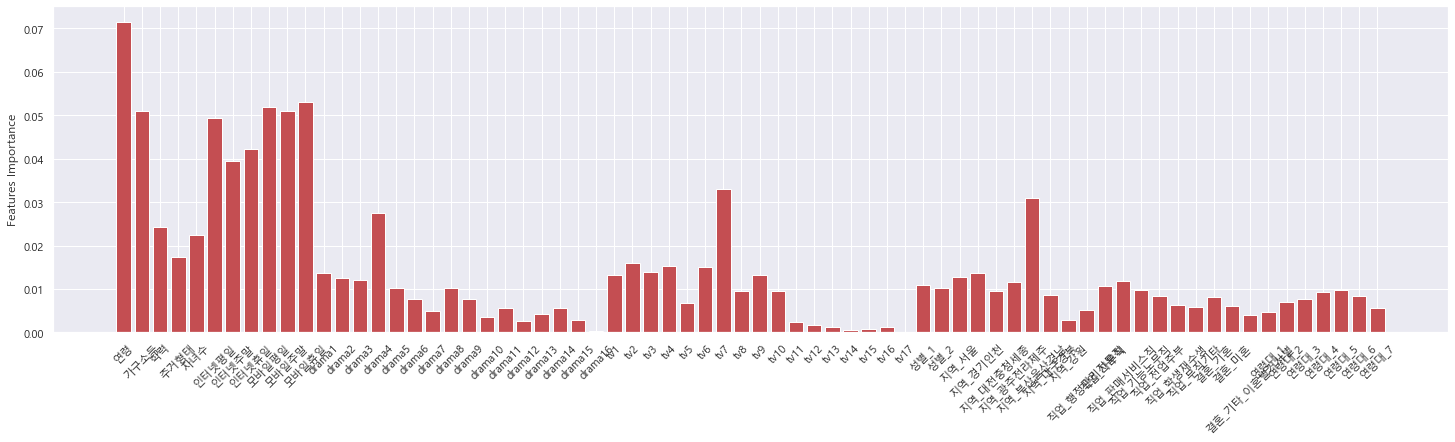

In [84]:
forest = RandomForestClassifier()
forest.fit(X, y)
plt.figure(figsize=(25,6)); plt.ylabel('Features Importance')
plt.xticks(np.arange(X.shape[1]), X.columns, rotation='45')
plt.bar(range(X.shape[1]), forest.feature_importances_, color='r')

Text(0.5, 0, '노랑은 True, 빨강은 False')

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, '노랑은 True, 빨강은 False')

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, '노랑은 True, 빨강은 False')

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, '노랑은 True, 빨강은 False')

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, '노랑은 True, 빨강은 False')

([], <a list of 0 Text major ticklabel objects>)

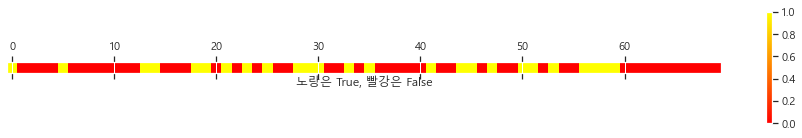

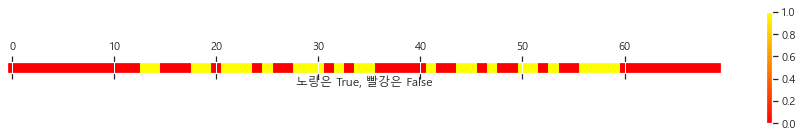

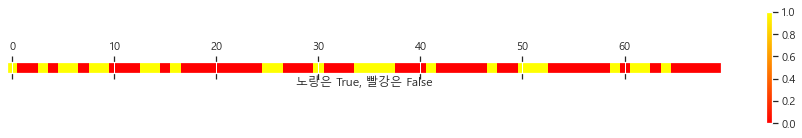

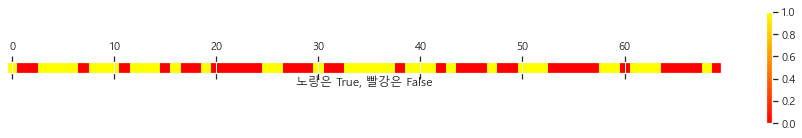

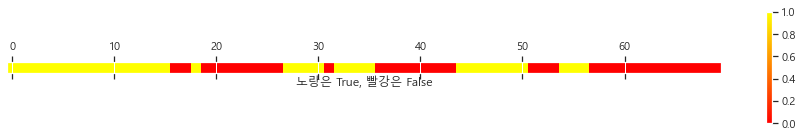

In [85]:
supports= [corr_support, chi_support, rfe_support, 
           embeded_lr2_support, embeded_rf_support]
for sp in supports :
    plt.matshow(np.array(sp).reshape(1, -1), cmap='autumn')
    plt.xlabel('노랑은 True, 빨강은 False')
    plt.yticks(());plt.colorbar()

In [86]:
feature_list = pd.DataFrame({'변수명':feature_name, 'Pearson':corr_support, 
                             'Chi-2':chi_support, 'RFE':rfe_support, 
                             'Logit_L2':embeded_lr2_support, 
                             'RF':embeded_rf_support
                            })
feature_list['총점'] = np.sum(feature_list, axis=1)
feature_list = feature_list.sort_values(['총점'] , ascending=False)
feature_list

,변수명,Pearson,Chi-2,RFE,Logit_L2,RF,총점
35,tv9,True,True,True,True,True,5
13,drama3,True,True,True,True,True,5
50,지역_부산울산경남,True,True,True,True,True,5
47,지역_경기인천,True,True,True,True,True,5
30,tv4,True,True,True,True,True,5
...,...,...,...,...,...,...,...
42,tv16,False,False,False,False,False,0
31,tv5,False,False,False,False,False,0
17,drama7,False,False,False,False,False,0
20,drama10,False,False,False,False,False,0


In [87]:
feature_list.to_excel('../output/feature.xlsx')
data01 = pd.read_excel('../output/feature.xlsx', index_col=0)
data01.head(2)

feature_list.to_pickle('../output/feature.pkl')
data02 = pd.read_pickle('../output/feature.pkl')
data02.head(2)

,변수명,Pearson,Chi-2,RFE,Logit_L2,RF,총점
35,tv9,True,True,True,True,True,5
13,drama3,True,True,True,True,True,5


,변수명,Pearson,Chi-2,RFE,Logit_L2,RF,총점
35,tv9,True,True,True,True,True,5
13,drama3,True,True,True,True,True,5


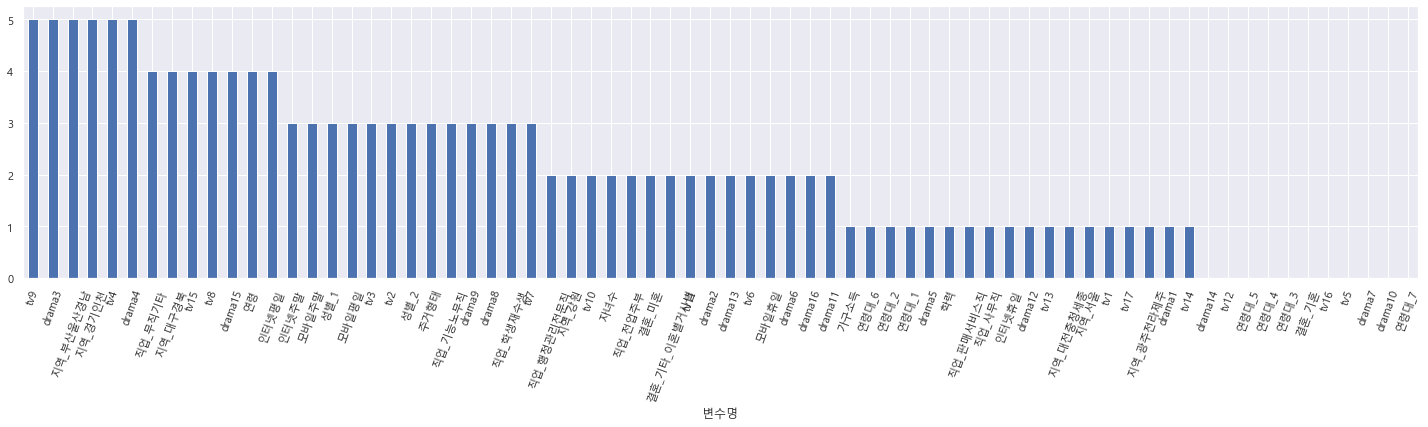

In [88]:
feature = feature_list.set_index('변수명')
pd.DataFrame(feature).총점.plot(kind='bar', rot = '70', figsize = (25, 5))

In [89]:
feature.shape
feature_select = feature[feature['총점'] >= 3]
feature_select.shape
feature_select.index

(70, 6)

(26, 6)

Index(['tv9', 'drama3', '지역_부산울산경남', '지역_경기인천', 'tv4', 'drama4', '직업_무직기타',
       '지역_대구경북', 'tv15', 'tv8', 'drama15', '연령', '인터넷평일', '인터넷주말', '모바일주말',
       '성별_1', '모바일평일', 'tv3', 'tv2', '성별_2', '주거형태', '직업_기능노무직', 'drama9',
       'drama8', '직업_학생재수생', 'tv7'],
      dtype='object', name='변수명')

In [94]:
print('nan, inf & -inf 의 개수는 ?  ', df.isin([np.nan, np.inf, -np.inf]).any(1).sum())

nan, inf & -inf 의 개수는 ?   0


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5]), <a list of 26 Text major ticklabel objects>)

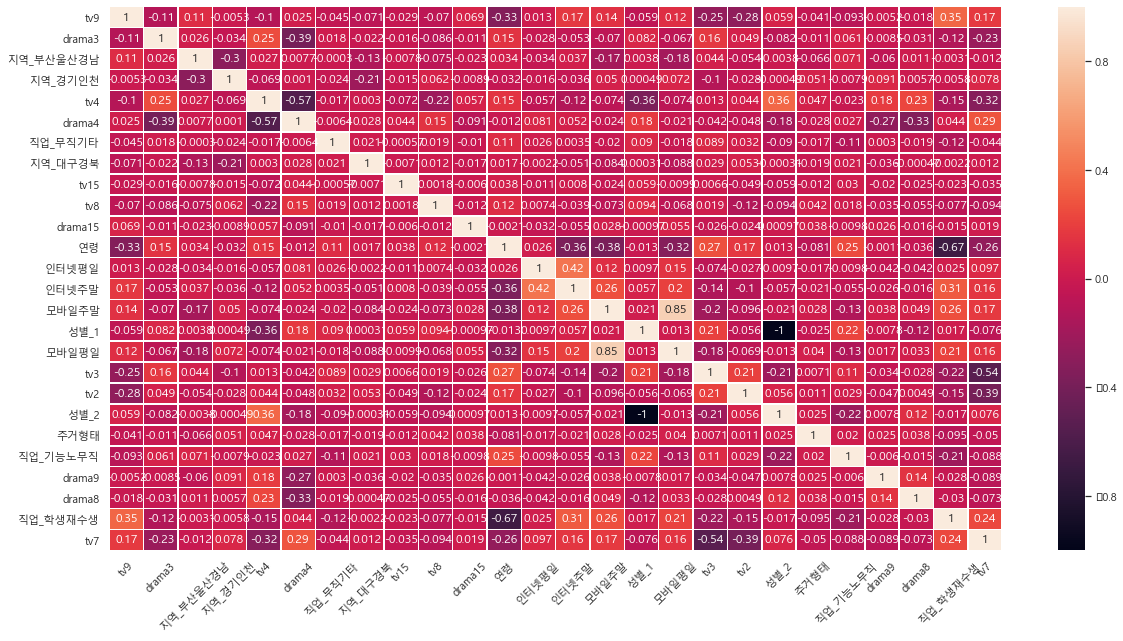

In [90]:
X = X[feature_select.index]
corr_matrix = X.corr(method = "spearman")
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(data = corr_matrix, annot = True, linewidths=.5, ax=ax)
plt.xticks(rotation=45)

In [91]:
X.to_pickle('../data/X.pkl')
y.to_pickle('../data/y.pkl')

Text(0.5, 1.0, '지역_경기인천구매/비구매')

Text(0.5, 1.0, 'tv4구매/비구매')

Text(0.5, 1.0, 'drama4구매/비구매')

Text(0.5, 1.0, '직업_무직기타구매/비구매')

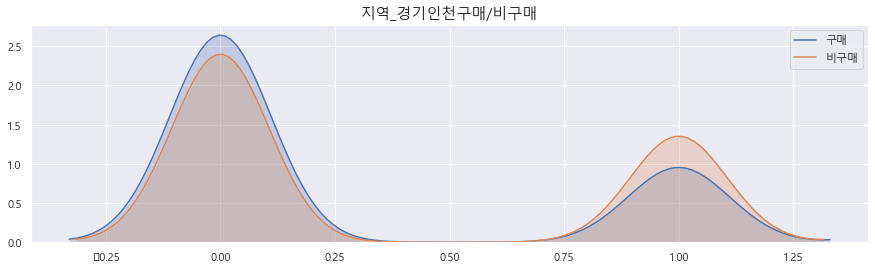

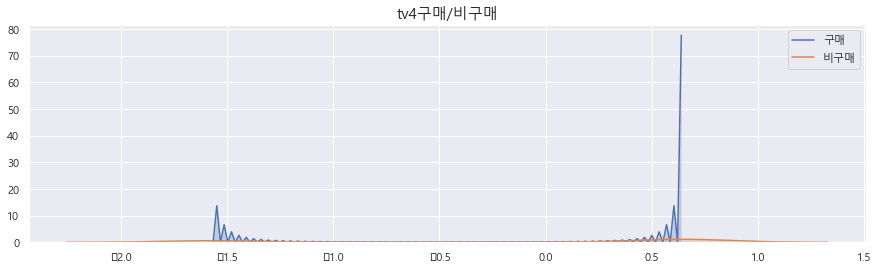

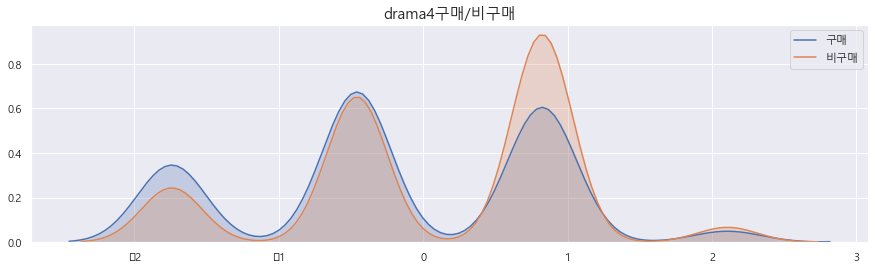

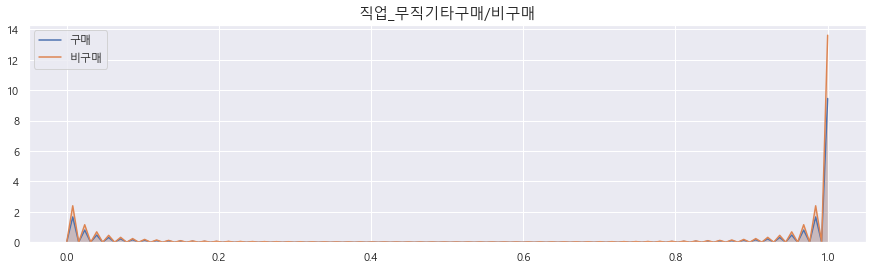

In [92]:
tf = X.copy(); tf['구매'] = y
for variable in tf.columns[3:7] : 
    fig = plt.figure(figsize=(15,4))
    ax=sns.kdeplot(tf.loc[(tf['구매'] == 1), variable], shade=True, label='구매')
    ax=sns.kdeplot(tf.loc[(tf['구매'] == 0), variable], shade=True, label='비구매')
    plt.title(variable + '구매/비구매', fontsize = 15)

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif.head()

,VIF Factor,features
0,1.027453,tv15
1,1.035029,drama15
2,1.057120,주거형태
3,1.066229,직업_무직기타
4,1.124084,지역_대구경북
